# Loan Default Prediction - Part 16 - Neural Networks with Different Architectures

This is an exploratory project for me to apply what I have learned in the Data Science and Machine Learning courses that I took this year. The data is from a Kaggle competition [Loan Default Prediction](https://www.kaggle.com/c/loan-default-prediction). 

This is Part 16 of the project: Neural Networks with Different Architectures.

In this part, I will add a hidden layer and try a few different regularization methods.

I will first load the normalized data.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import time
import project_utils as utils
import project_keras_utils as keras_utils

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Load the training data (imputed and normalized) from the CSV file
df, X, y = utils.load_csv('train_v2_preprocessed_normalized.csv')

# Separate training and validation sets
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
X_train, y_train, X_valid, y_valid = utils.split_data(kf, X, y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 1789 entries, f3 to loss
dtypes: float64(1789)
memory usage: 1.4 GB


## Adding More Hidden Layers

I will base my implementation on the last part, but add some more hidden layers.

In [20]:
import tensorflow as tf
import keras
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Activation, Dropout

In [4]:
# Define parameters

n_features = X.shape[1]
n_epochs = 30
batch_size = 256
class_weight = {0: 1., 1: 10.}

First, I will add another hidden layer of 8 neurons.

In [7]:
# Build Keras model

inputs = Input(shape=(n_features,), name='input')
x = Dense(8, activation='relu')(inputs)
x = Dense(4, activation='relu')(x)
class_output = Dense(1, activation='sigmoid', name='class_output')(x)
clf = Model(inputs=inputs, outputs=class_output)

clf.compile(loss='binary_crossentropy',
            optimizer=keras.optimizers.Adamax(lr=0.001),
            metrics=['binary_accuracy'])

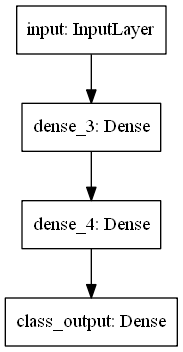

In [8]:
# Plot the model

from keras.utils import plot_model
plot_model(clf, to_file='model.png')

from IPython.display import Image
Image("model.png")

Epoch 1/30
84376/84376 [==============================] - 10s 124us/step - loss: 1.2484 - binary_accuracy: 0.4979
Epoch 2/30
84376/84376 [==============================] - 10s 124us/step - loss: 1.2229 - binary_accuracy: 0.5839
Epoch 3/30
84376/84376 [==============================] - 10s 122us/step - loss: 1.2083 - binary_accuracy: 0.6032
Epoch 4/30
84376/84376 [==============================] - 10s 122us/step - loss: 1.1960 - binary_accuracy: 0.6072
Epoch 5/30
84376/84376 [==============================] - 10s 120us/step - loss: 1.1856 - binary_accuracy: 0.6105
Epoch 6/30
84376/84376 [==============================] - 10s 120us/step - loss: 1.1762 - binary_accuracy: 0.6194
Epoch 7/30
84376/84376 [==============================] - 10s 119us/step - loss: 1.1675 - binary_accuracy: 0.6226
Epoch 8/30
84376/84376 [==============================] - 10s 120us/step - loss: 1.1601 - binary_accuracy: 0.6255
Epoch 9/30
84376/84376 [==============================] - 10s 121us/step - loss: 1.1521 

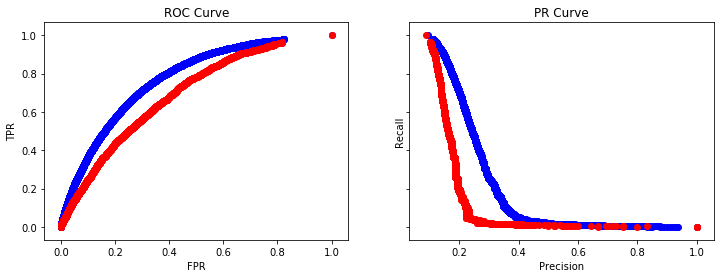

In [9]:
# Train and evaluate the model with class weights

fit_time = keras_utils.train_model(clf, X_train, y_train, n_epochs, batch_size, class_weight)
acc_score, rocauc_score, prauc_score, eval_time = keras_utils.evaluate(clf, X_train, y_train, X_valid, y_valid)

I got an ROCAUC of 0.697, a bit worse than what I got from the previous part. I'll try a few different other widths, with the first hidden layer and the second hidden layer both having width __k__.

In [10]:
ks = [2, 4, 6, 8, 12, 16, 24, 32]

----- width = 2 -----
Epoch 1/30
84376/84376 [==============================] - 6s 73us/step - loss: 1.2441 - binary_accuracy: 0.5830
Epoch 2/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.2202 - binary_accuracy: 0.5944
Epoch 3/30
84376/84376 [==============================] - 6s 66us/step - loss: 1.2055 - binary_accuracy: 0.6114
Epoch 4/30
84376/84376 [==============================] - 5s 63us/step - loss: 1.1945 - binary_accuracy: 0.6193
Epoch 5/30
84376/84376 [==============================] - 5s 58us/step - loss: 1.1842 - binary_accuracy: 0.6140
Epoch 6/30
84376/84376 [==============================] - 5s 64us/step - loss: 1.1754 - binary_accuracy: 0.6276
Epoch 7/30
84376/84376 [==============================] - 5s 63us/step - loss: 1.1684 - binary_accuracy: 0.6223
Epoch 8/30
84376/84376 [==============================] - 5s 64us/step - loss: 1.1625 - binary_accuracy: 0.6253
Epoch 9/30
84376/84376 [==============================] - 5s 64us/step - loss: 1.1

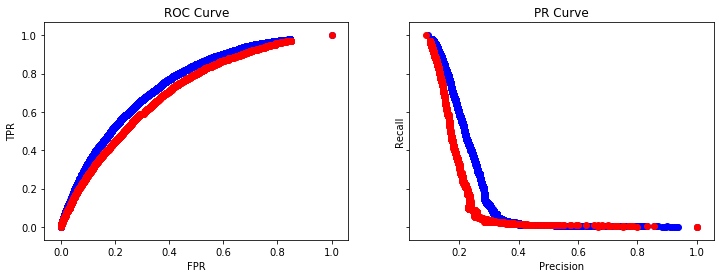

----- width = 4 -----
Epoch 1/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.2126 - binary_accuracy: 0.4977
Epoch 2/30
84376/84376 [==============================] - 5s 65us/step - loss: 1.1864 - binary_accuracy: 0.4901
Epoch 3/30
84376/84376 [==============================] - 5s 62us/step - loss: 1.1750 - binary_accuracy: 0.5064
Epoch 4/30
84376/84376 [==============================] - 5s 59us/step - loss: 1.1652 - binary_accuracy: 0.5207
Epoch 5/30
84376/84376 [==============================] - 5s 65us/step - loss: 1.1580 - binary_accuracy: 0.5421
Epoch 6/30
84376/84376 [==============================] - 5s 65us/step - loss: 1.1508 - binary_accuracy: 0.5492
Epoch 7/30
84376/84376 [==============================] - 5s 65us/step - loss: 1.1442 - binary_accuracy: 0.5592
Epoch 8/30
84376/84376 [==============================] - 5s 65us/step - loss: 1.1388 - binary_accuracy: 0.5656
Epoch 9/30
84376/84376 [==============================] - 5s 65us/step - loss: 1.1

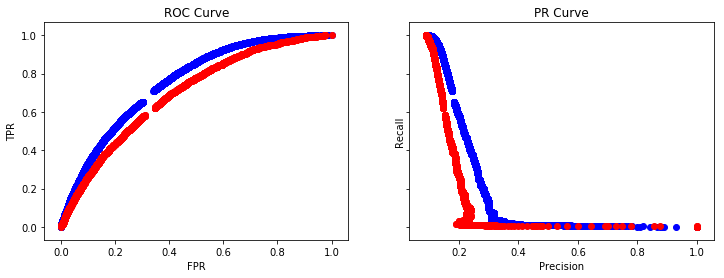

----- width = 6 -----
Epoch 1/30
84376/84376 [==============================] - 6s 71us/step - loss: 1.2193 - binary_accuracy: 0.5044
Epoch 2/30
84376/84376 [==============================] - 5s 62us/step - loss: 1.1793 - binary_accuracy: 0.5567
Epoch 3/30
84376/84376 [==============================] - 5s 62us/step - loss: 1.1686 - binary_accuracy: 0.5690
Epoch 4/30
84376/84376 [==============================] - 6s 65us/step - loss: 1.1596 - binary_accuracy: 0.5752
Epoch 5/30
84376/84376 [==============================] - 5s 64us/step - loss: 1.1512 - binary_accuracy: 0.5912
Epoch 6/30
84376/84376 [==============================] - 5s 64us/step - loss: 1.1433 - binary_accuracy: 0.5919
Epoch 7/30
84376/84376 [==============================] - 5s 64us/step - loss: 1.1362 - binary_accuracy: 0.6023
Epoch 8/30
84376/84376 [==============================] - 5s 64us/step - loss: 1.1293 - binary_accuracy: 0.6040
Epoch 9/30
84376/84376 [==============================] - 5s 65us/step - loss: 1.1

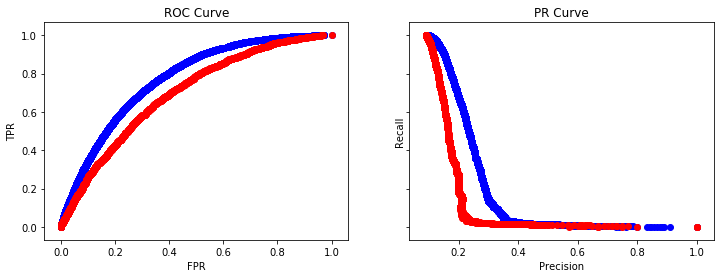

----- width = 8 -----
Epoch 1/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.2261 - binary_accuracy: 0.5766
Epoch 2/30
84376/84376 [==============================] - 5s 59us/step - loss: 1.1909 - binary_accuracy: 0.5313
Epoch 3/30
84376/84376 [==============================] - 5s 64us/step - loss: 1.1761 - binary_accuracy: 0.5576
Epoch 4/30
84376/84376 [==============================] - 5s 64us/step - loss: 1.1638 - binary_accuracy: 0.5710: 2s
Epoch 5/30
84376/84376 [==============================] - 5s 64us/step - loss: 1.1532 - binary_accuracy: 0.5919
Epoch 6/30
84376/84376 [==============================] - 5s 64us/step - loss: 1.1440 - binary_accuracy: 0.5968
Epoch 7/30
84376/84376 [==============================] - 5s 63us/step - loss: 1.1367 - binary_accuracy: 0.5989
Epoch 8/30
84376/84376 [==============================] - 5s 63us/step - loss: 1.1295 - binary_accuracy: 0.6115
Epoch 9/30
84376/84376 [==============================] - 5s 64us/step - loss:

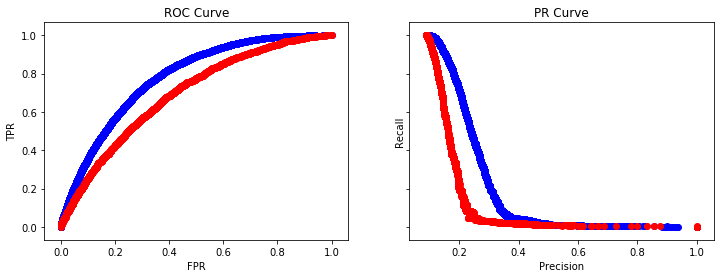

----- width = 12 -----
Epoch 1/30
84376/84376 [==============================] - 6s 66us/step - loss: 1.2042 - binary_accuracy: 0.5606
Epoch 2/30
84376/84376 [==============================] - 6s 66us/step - loss: 1.1715 - binary_accuracy: 0.5866
Epoch 3/30
84376/84376 [==============================] - 6s 66us/step - loss: 1.1557 - binary_accuracy: 0.5992
Epoch 4/30
84376/84376 [==============================] - 6s 66us/step - loss: 1.1406 - binary_accuracy: 0.6039
Epoch 5/30
84376/84376 [==============================] - 6s 66us/step - loss: 1.1299 - binary_accuracy: 0.6188
Epoch 6/30
84376/84376 [==============================] - 6s 66us/step - loss: 1.1177 - binary_accuracy: 0.6199
Epoch 7/30
84376/84376 [==============================] - 6s 66us/step - loss: 1.1092 - binary_accuracy: 0.6298
Epoch 8/30
84376/84376 [==============================] - 6s 66us/step - loss: 1.1016 - binary_accuracy: 0.6344
Epoch 9/30
84376/84376 [==============================] - 6s 66us/step - loss: 1.

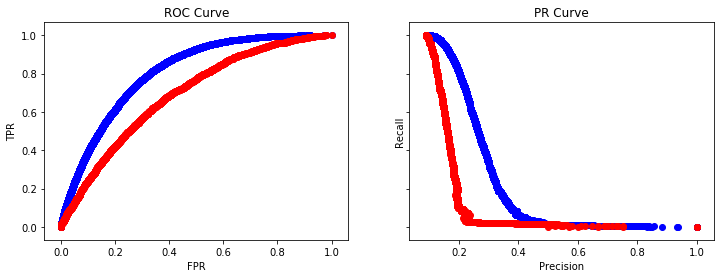

----- width = 16 -----
Epoch 1/30
84376/84376 [==============================] - 6s 73us/step - loss: 1.2032 - binary_accuracy: 0.5416
Epoch 2/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.1710 - binary_accuracy: 0.5716
Epoch 3/30
84376/84376 [==============================] - 6s 66us/step - loss: 1.1543 - binary_accuracy: 0.5895
Epoch 4/30
84376/84376 [==============================] - 6s 66us/step - loss: 1.1386 - binary_accuracy: 0.6031
Epoch 5/30
84376/84376 [==============================] - 6s 66us/step - loss: 1.1254 - binary_accuracy: 0.6156
Epoch 6/30
84376/84376 [==============================] - 6s 66us/step - loss: 1.1152 - binary_accuracy: 0.6198
Epoch 7/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.1053 - binary_accuracy: 0.6246
Epoch 8/30
84376/84376 [==============================] - 6s 66us/step - loss: 1.0948 - binary_accuracy: 0.6266
Epoch 9/30
84376/84376 [==============================] - 6s 66us/step - loss: 1.

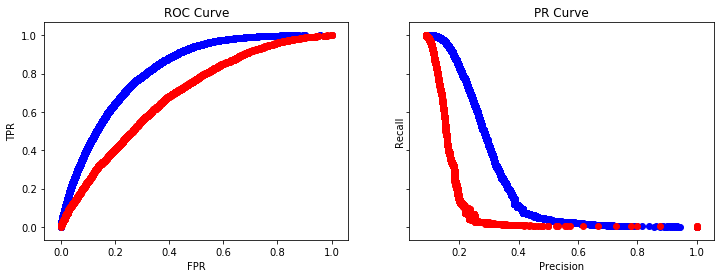

----- width = 24 -----
Epoch 1/30
84376/84376 [==============================] - 6s 73us/step - loss: 1.2062 - binary_accuracy: 0.5477
Epoch 2/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.1671 - binary_accuracy: 0.5683
Epoch 3/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.1490 - binary_accuracy: 0.5905
Epoch 4/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.1304 - binary_accuracy: 0.5974
Epoch 5/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.1136 - binary_accuracy: 0.6153
Epoch 6/30
84376/84376 [==============================] - 6s 69us/step - loss: 1.0999 - binary_accuracy: 0.6206
Epoch 7/30
84376/84376 [==============================] - 6s 71us/step - loss: 1.0858 - binary_accuracy: 0.6285
Epoch 8/30
84376/84376 [==============================] - 6s 72us/step - loss: 1.0747 - binary_accuracy: 0.6333
Epoch 9/30
84376/84376 [==============================] - 6s 69us/step - loss: 1.

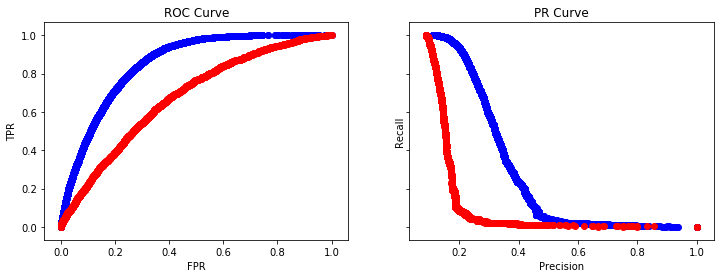

----- width = 32 -----
Epoch 1/30
84376/84376 [==============================] - 6s 73us/step - loss: 1.1995 - binary_accuracy: 0.5593
Epoch 2/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.1620 - binary_accuracy: 0.5863
Epoch 3/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.1381 - binary_accuracy: 0.5949
Epoch 4/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.1205 - binary_accuracy: 0.6116
Epoch 5/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.1033 - binary_accuracy: 0.6260
Epoch 6/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.0885 - binary_accuracy: 0.6308
Epoch 7/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.0710 - binary_accuracy: 0.6431
Epoch 8/30
84376/84376 [==============================] - 6s 66us/step - loss: 1.0593 - binary_accuracy: 0.6499
Epoch 9/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.

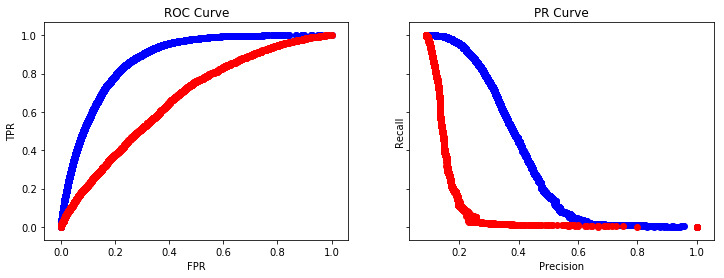

In [17]:
fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []

for k in ks:
    print('----- width = %d -----' % k)

    # Build Keras model
    inputs = Input(shape=(n_features,), name='input')
    x = Dense(k, activation='relu')(inputs)
    x = Dense(k, activation='relu')(x)
    class_output = Dense(1, activation='sigmoid', name='class_output')(x)
    clf = Model(inputs=inputs, outputs=class_output)

    clf.compile(loss='binary_crossentropy',
                optimizer=keras.optimizers.Adamax(lr=0.001),
                metrics=['binary_accuracy'])

    fit_time = keras_utils.train_model(clf, X_train, y_train, n_epochs, batch_size, class_weight)
    acc_score, rocauc_score, prauc_score, eval_time = keras_utils.evaluate(clf, X_train, y_train, X_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)

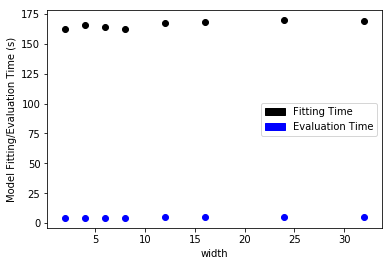

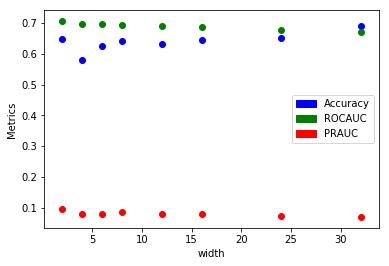

   0_width  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
0        2    0.647926  0.706714  0.095241  162.721807     4.406848
1        4    0.578858  0.696175  0.080668  166.106845     4.443789
2        6    0.624176  0.697782  0.080524  164.264111     4.569271
3        8    0.640958  0.692615  0.085233  162.120082     4.549572
4       12    0.631382  0.691084  0.077993  167.774120     4.949623
5       16    0.643991  0.688294  0.078160  168.299459     4.798194
6       24    0.651813  0.677415  0.073180  169.769772     4.965391
7       32    0.690922  0.669324  0.069020  169.450551     5.144591


         0_width  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
count   8.000000    8.000000  8.000000  8.000000    8.000000     8.000000
mean   13.000000    0.638753  0.689925  0.080002  166.313343     4.728410
std    10.474459    0.031312  0.011801  0.007882    2.990271     0.273833
min     2.000000    0.578858  0.669324  0.069020  162.120082     4.406848
25%     5.500000

In [18]:
utils.plot_metrics(ks, 'width', False, fit_times, eval_times, acc_scores, rocauc_scores, prauc_scores)

The best result is from width = 2. Next, I'll try making the first layer with width = 2__k__ and the second layer with width = __k__.

----- width = 2 -----
Epoch 1/30
84376/84376 [==============================] - 10s 119us/step - loss: 1.2429 - binary_accuracy: 0.4199
Epoch 2/30
84376/84376 [==============================] - 10s 115us/step - loss: 1.2166 - binary_accuracy: 0.4372
Epoch 3/30
84376/84376 [==============================] - 10s 114us/step - loss: 1.2030 - binary_accuracy: 0.4521
Epoch 4/30
84376/84376 [==============================] - 10s 114us/step - loss: 1.1902 - binary_accuracy: 0.4699
Epoch 5/30
84376/84376 [==============================] - 9s 112us/step - loss: 1.1804 - binary_accuracy: 0.5013
Epoch 6/30
84376/84376 [==============================] - 9s 112us/step - loss: 1.1681 - binary_accuracy: 0.5160
Epoch 7/30
84376/84376 [==============================] - 9s 112us/step - loss: 1.1600 - binary_accuracy: 0.5333
Epoch 8/30
84376/84376 [==============================] - 9s 112us/step - loss: 1.1514 - binary_accuracy: 0.5455
Epoch 9/30
84376/84376 [==============================] - 10s 113us/st

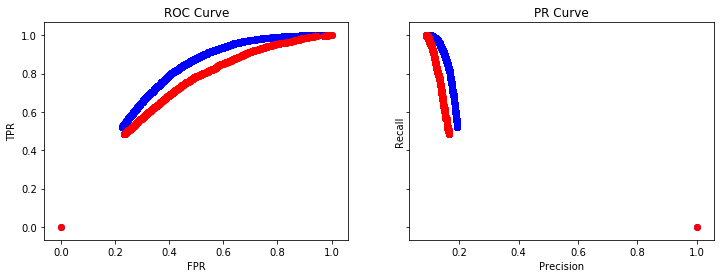

----- width = 4 -----
Epoch 1/30
84376/84376 [==============================] - 10s 116us/step - loss: 1.2329 - binary_accuracy: 0.5689
Epoch 2/30
84376/84376 [==============================] - 9s 112us/step - loss: 1.2013 - binary_accuracy: 0.5335
Epoch 3/30
84376/84376 [==============================] - 9s 112us/step - loss: 1.1791 - binary_accuracy: 0.5498
Epoch 4/30
84376/84376 [==============================] - 9s 112us/step - loss: 1.1653 - binary_accuracy: 0.5705
Epoch 5/30
84376/84376 [==============================] - 9s 112us/step - loss: 1.1546 - binary_accuracy: 0.5857
Epoch 6/30
84376/84376 [==============================] - 9s 112us/step - loss: 1.1440 - binary_accuracy: 0.5983
Epoch 7/30
84376/84376 [==============================] - 9s 112us/step - loss: 1.1342 - binary_accuracy: 0.6067
Epoch 8/30
84376/84376 [==============================] - 9s 112us/step - loss: 1.1267 - binary_accuracy: 0.6135
Epoch 9/30
84376/84376 [==============================] - 9s 112us/step -

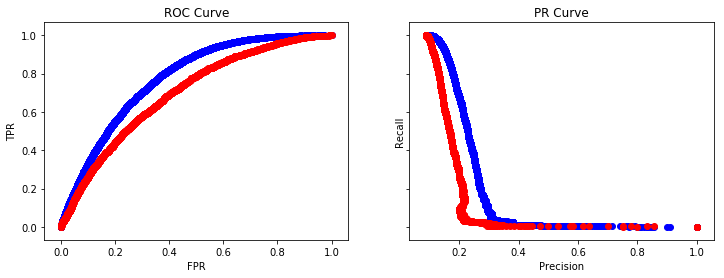

----- width = 6 -----
Epoch 1/30
84376/84376 [==============================] - 10s 123us/step - loss: 1.2164 - binary_accuracy: 0.55121s - loss: 1.21
Epoch 2/30
84376/84376 [==============================] - 10s 118us/step - loss: 1.1759 - binary_accuracy: 0.5676
Epoch 3/30
84376/84376 [==============================] - 10s 119us/step - loss: 1.1590 - binary_accuracy: 0.5857
Epoch 4/30
84376/84376 [==============================] - 10s 118us/step - loss: 1.1455 - binary_accuracy: 0.5973
Epoch 5/30
84376/84376 [==============================] - 10s 118us/step - loss: 1.1311 - binary_accuracy: 0.6068
Epoch 6/30
84376/84376 [==============================] - 10s 118us/step - loss: 1.1206 - binary_accuracy: 0.6109
Epoch 7/30
84376/84376 [==============================] - 10s 117us/step - loss: 1.1111 - binary_accuracy: 0.6191
Epoch 8/30
84376/84376 [==============================] - 10s 118us/step - loss: 1.1016 - binary_accuracy: 0.6228
Epoch 9/30
84376/84376 [===========================

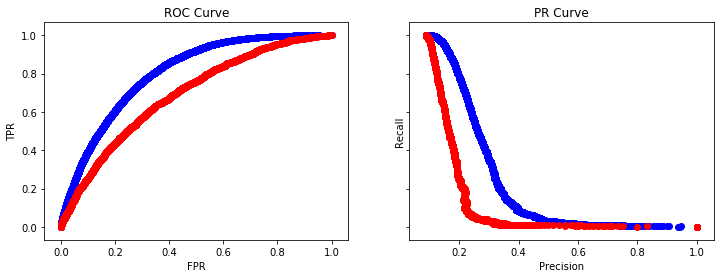

----- width = 8 -----
Epoch 1/30
84376/84376 [==============================] - 10s 123us/step - loss: 1.2083 - binary_accuracy: 0.5284
Epoch 2/30
84376/84376 [==============================] - 10s 118us/step - loss: 1.1723 - binary_accuracy: 0.5640
Epoch 3/30
84376/84376 [==============================] - 10s 118us/step - loss: 1.1545 - binary_accuracy: 0.5822
Epoch 4/30
84376/84376 [==============================] - 10s 119us/step - loss: 1.1389 - binary_accuracy: 0.5986
Epoch 5/30
84376/84376 [==============================] - 10s 117us/step - loss: 1.1251 - binary_accuracy: 0.6083
Epoch 6/30
84376/84376 [==============================] - 10s 118us/step - loss: 1.1129 - binary_accuracy: 0.6181
Epoch 7/30
84376/84376 [==============================] - 10s 119us/step - loss: 1.1020 - binary_accuracy: 0.6241
Epoch 8/30
84376/84376 [==============================] - 10s 121us/step - loss: 1.0927 - binary_accuracy: 0.6257
Epoch 9/30
84376/84376 [==============================] - 10s 119u

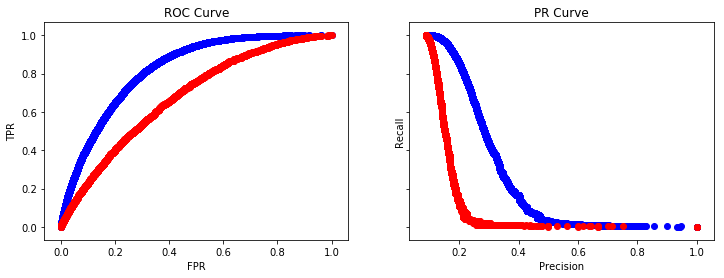

----- width = 12 -----
Epoch 1/30
84376/84376 [==============================] - 6s 72us/step - loss: 1.2073 - binary_accuracy: 0.5444
Epoch 2/30
84376/84376 [==============================] - 6s 66us/step - loss: 1.1682 - binary_accuracy: 0.5719
Epoch 3/30
84376/84376 [==============================] - 5s 65us/step - loss: 1.1478 - binary_accuracy: 0.5878
Epoch 4/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.1306 - binary_accuracy: 0.6025
Epoch 5/30
84376/84376 [==============================] - 5s 64us/step - loss: 1.1151 - binary_accuracy: 0.6128
Epoch 6/30
84376/84376 [==============================] - 5s 64us/step - loss: 1.1005 - binary_accuracy: 0.6236
Epoch 7/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.0868 - binary_accuracy: 0.6291
Epoch 8/30
84376/84376 [==============================] - 6s 65us/step - loss: 1.0750 - binary_accuracy: 0.6341
Epoch 9/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.

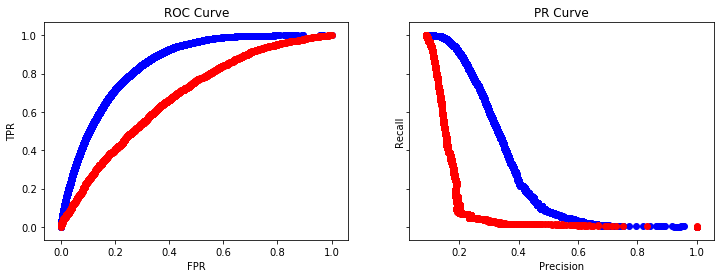

----- width = 16 -----
Epoch 1/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.2060 - binary_accuracy: 0.5660
Epoch 2/30
84376/84376 [==============================] - 5s 65us/step - loss: 1.1613 - binary_accuracy: 0.5922
Epoch 3/30
84376/84376 [==============================] - 6s 65us/step - loss: 1.1391 - binary_accuracy: 0.6044
Epoch 4/30
84376/84376 [==============================] - 5s 65us/step - loss: 1.1189 - binary_accuracy: 0.6196
Epoch 5/30
84376/84376 [==============================] - 6s 65us/step - loss: 1.1033 - binary_accuracy: 0.6299
Epoch 6/30
84376/84376 [==============================] - 6s 65us/step - loss: 1.0892 - binary_accuracy: 0.6339
Epoch 7/30
84376/84376 [==============================] - 6s 65us/step - loss: 1.0732 - binary_accuracy: 0.6434
Epoch 8/30
84376/84376 [==============================] - 5s 65us/step - loss: 1.0609 - binary_accuracy: 0.6499
Epoch 9/30
84376/84376 [==============================] - 6s 65us/step - loss: 1.

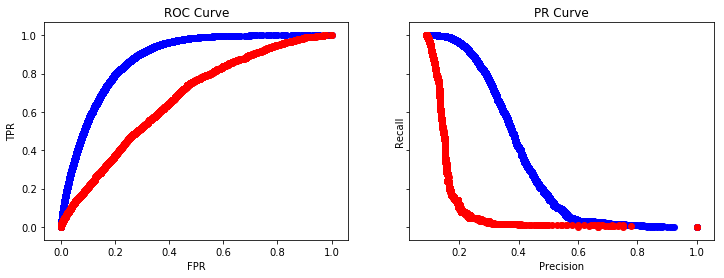

----- width = 24 -----
Epoch 1/30
84376/84376 [==============================] - 6s 72us/step - loss: 1.2055 - binary_accuracy: 0.5643
Epoch 2/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.1561 - binary_accuracy: 0.5927: 0s - loss: 1.1615 - binar
Epoch 3/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.1308 - binary_accuracy: 0.6074
Epoch 4/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.1072 - binary_accuracy: 0.6258
Epoch 5/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.0898 - binary_accuracy: 0.6325
Epoch 6/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.0692 - binary_accuracy: 0.6431
Epoch 7/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.0509 - binary_accuracy: 0.6548
Epoch 8/30
84376/84376 [==============================] - 6s 67us/step - loss: 1.0354 - binary_accuracy: 0.6607
Epoch 9/30
84376/84376 [==============================

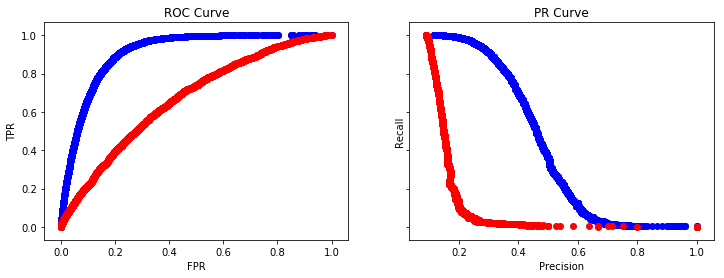

----- width = 32 -----
Epoch 1/30
84376/84376 [==============================] - 6s 73us/step - loss: 1.1979 - binary_accuracy: 0.5672
Epoch 2/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.1520 - binary_accuracy: 0.5982
Epoch 3/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.1281 - binary_accuracy: 0.6122
Epoch 4/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.1060 - binary_accuracy: 0.6265
Epoch 5/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.0814 - binary_accuracy: 0.6397
Epoch 6/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.0643 - binary_accuracy: 0.6456
Epoch 7/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.0431 - binary_accuracy: 0.6588
Epoch 8/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.0235 - binary_accuracy: 0.6634
Epoch 9/30
84376/84376 [==============================] - 6s 68us/step - loss: 1.

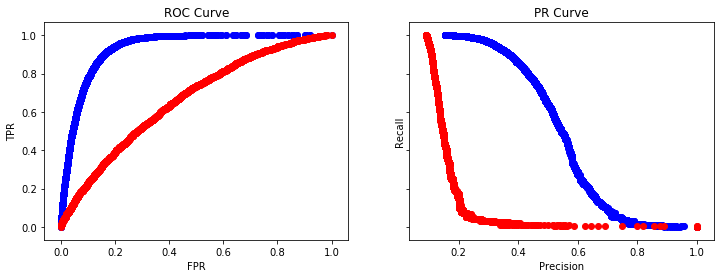

In [15]:
fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []

for k in ks:
    print('----- width = %d -----' % k)

    # Build Keras model
    inputs = Input(shape=(n_features,), name='input')
    x = Dense(int(k * 2), activation='relu')(inputs)
    x = Dense(k, activation='relu')(x)
    class_output = Dense(1, activation='sigmoid', name='class_output')(x)
    clf = Model(inputs=inputs, outputs=class_output)

    clf.compile(loss='binary_crossentropy',
                optimizer=keras.optimizers.Adamax(lr=0.001),
                metrics=['binary_accuracy'])

    fit_time = keras_utils.train_model(clf, X_train, y_train, n_epochs, batch_size, class_weight)
    acc_score, rocauc_score, prauc_score, eval_time = keras_utils.evaluate(clf, X_train, y_train, X_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)
    

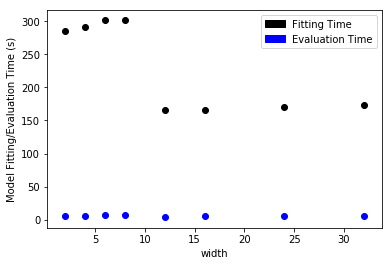

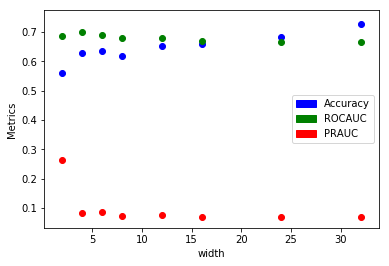

   0_width  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
0        2    0.560702  0.687825  0.262344  285.289630     5.366588
1        4    0.627684  0.699219  0.082341  291.249945     5.812197
2        6    0.636928  0.691037  0.085246  301.443044     6.167344
3        8    0.618820  0.679471  0.071873  301.763642     6.435312
4       12    0.652667  0.681215  0.076677  165.527248     4.530910
5       16    0.658829  0.670879  0.069495  165.502892     4.770866
6       24    0.683764  0.667457  0.068797  169.689824     4.976196
7       32    0.726523  0.664541  0.070620  173.252626     5.227334


         0_width  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
count   8.000000    8.000000  8.000000  8.000000    8.000000     8.000000
mean   13.000000    0.645740  0.680206  0.098424  231.714856     5.410843
std    10.474459    0.048625  0.012150  0.066513   67.837302     0.675206
min     2.000000    0.560702  0.664541  0.068797  165.502892     4.530910
25%     5.500000

In [16]:
utils.plot_metrics(ks, 'width', False, fit_times, eval_times, acc_scores, rocauc_scores, prauc_scores)

Similar to the previous part, overfitting is more pronounced as the width increases, and the best ROCAUC is obtained at a small width of 4. To overcome the overfitting, I will add a Dropout layer between each pair of Dense layers.

In [27]:
# Build Keras model

inputs = Input(shape=(n_features,), name='input')
x = Dense(8, activation='relu')(inputs)
x = Dropout(0.4)(x)
x = Dense(4, activation='relu')(x)
x = Dropout(0.4)(x)
class_output = Dense(1, activation='sigmoid', name='class_output')(x)
clf = Model(inputs=inputs, outputs=class_output)

clf.compile(loss='binary_crossentropy',
            optimizer=keras.optimizers.Adamax(lr=0.001),
            metrics=['binary_accuracy'])

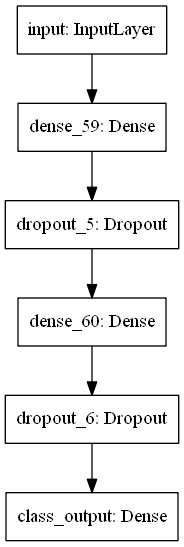

In [28]:
# Plot the model

plot_model(clf, to_file='model.png')
Image("model.png")

Epoch 1/30
84376/84376 [==============================] - 7s 80us/step - loss: 1.2875 - binary_accuracy: 0.4208
Epoch 2/30
84376/84376 [==============================] - 6s 71us/step - loss: 1.2473 - binary_accuracy: 0.3872
Epoch 3/30
84376/84376 [==============================] - 6s 72us/step - loss: 1.2347 - binary_accuracy: 0.3768
Epoch 4/30
84376/84376 [==============================] - 6s 71us/step - loss: 1.2253 - binary_accuracy: 0.3858
Epoch 5/30
84376/84376 [==============================] - 6s 71us/step - loss: 1.2207 - binary_accuracy: 0.3797
Epoch 6/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.2193 - binary_accuracy: 0.3820
Epoch 7/30
84376/84376 [==============================] - 6s 71us/step - loss: 1.2127 - binary_accuracy: 0.3939
Epoch 8/30
84376/84376 [==============================] - 6s 71us/step - loss: 1.2080 - binary_accuracy: 0.4055
Epoch 9/30
84376/84376 [==============================] - 6s 71us/step - loss: 1.2058 - binary_accuracy:

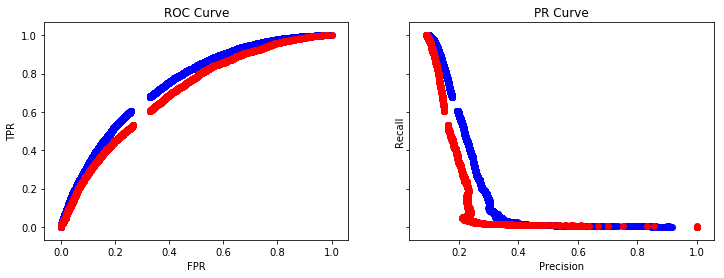

In [29]:
# Train and evaluate the model with class weights

fit_time = keras_utils.train_model(clf, X_train, y_train, n_epochs, batch_size, class_weight)
acc_score, rocauc_score, prauc_score, eval_time = keras_utils.evaluate(clf, X_train, y_train, X_valid, y_valid)

The ROCAUC improved to 0.701 after adding Dropout. I'll try this on a wider neural network too.

In [30]:
# Build Keras model

inputs = Input(shape=(n_features,), name='input')
x = Dense(32, activation='relu')(inputs)
x = Dropout(0.4)(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.4)(x)
class_output = Dense(1, activation='sigmoid', name='class_output')(x)
clf = Model(inputs=inputs, outputs=class_output)

clf.compile(loss='binary_crossentropy',
            optimizer=keras.optimizers.Adamax(lr=0.001),
            metrics=['binary_accuracy'])

Epoch 1/30
84376/84376 [==============================] - 7s 82us/step - loss: 1.2889 - binary_accuracy: 0.5659
Epoch 2/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.2252 - binary_accuracy: 0.5328
Epoch 3/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.2120 - binary_accuracy: 0.5097
Epoch 4/30
84376/84376 [==============================] - 6s 71us/step - loss: 1.2066 - binary_accuracy: 0.5202
Epoch 5/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.1944 - binary_accuracy: 0.5256
Epoch 6/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.1889 - binary_accuracy: 0.5404
Epoch 7/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.1845 - binary_accuracy: 0.5370
Epoch 8/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.1769 - binary_accuracy: 0.5466
Epoch 9/30
84376/84376 [==============================] - 6s 70us/step - loss: 1.1723 - binary_accuracy:

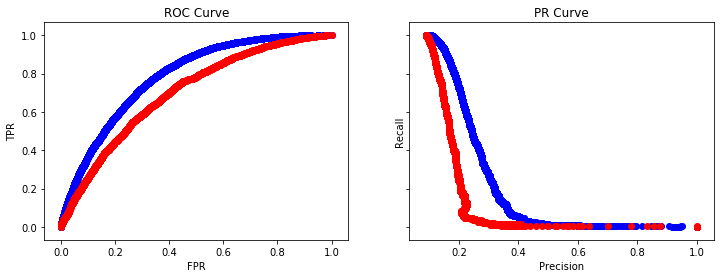

In [31]:
# Train and evaluate the model with class weights

fit_time = keras_utils.train_model(clf, X_train, y_train, n_epochs, batch_size, class_weight)
acc_score, rocauc_score, prauc_score, eval_time = keras_utils.evaluate(clf, X_train, y_train, X_valid, y_valid)

The ROCAUC improved from 0.671 to 0.701 after adding Dropout.

## Adding a Third Layer

In [36]:
# Build Keras model

inputs = Input(shape=(n_features,), name='input')
x = Dense(32, activation='relu')(inputs)
x = Dropout(0.4)(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(4, activation='relu')(x)
x = Dropout(0.4)(x)
class_output = Dense(1, activation='sigmoid', name='class_output')(x)
clf = Model(inputs=inputs, outputs=class_output)

clf.compile(loss='binary_crossentropy',
            optimizer=keras.optimizers.Adamax(lr=0.001),
            metrics=['binary_accuracy'])

Epoch 1/30
84376/84376 [==============================] - 7s 84us/step - loss: 1.2864 - binary_accuracy: 0.6818
Epoch 2/30
84376/84376 [==============================] - 6s 72us/step - loss: 1.2604 - binary_accuracy: 0.7128
Epoch 3/30
84376/84376 [==============================] - 6s 71us/step - loss: 1.2490 - binary_accuracy: 0.3995
Epoch 4/30
84376/84376 [==============================] - 6s 72us/step - loss: 1.2480 - binary_accuracy: 0.3870
Epoch 5/30
84376/84376 [==============================] - 6s 76us/step - loss: 1.2395 - binary_accuracy: 0.3820
Epoch 6/30
84376/84376 [==============================] - 6s 72us/step - loss: 1.2372 - binary_accuracy: 0.3790
Epoch 7/30
84376/84376 [==============================] - 5s 64us/step - loss: 1.2354 - binary_accuracy: 0.3745
Epoch 8/30
84376/84376 [==============================] - 6s 73us/step - loss: 1.2305 - binary_accuracy: 0.3842
Epoch 9/30
84376/84376 [==============================] - 6s 76us/step - loss: 1.2255 - binary_accuracy:

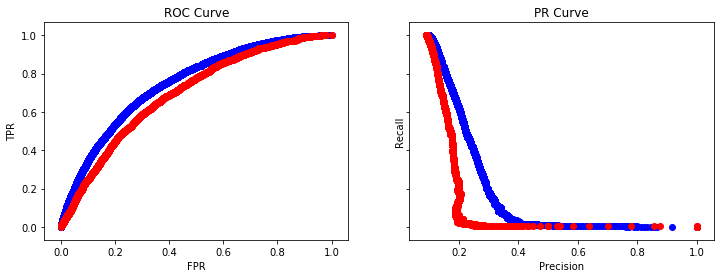

In [37]:
# Train and evaluate the model with class weights

fit_time = keras_utils.train_model(clf, X_train, y_train, n_epochs, batch_size, class_weight)
acc_score, rocauc_score, prauc_score, eval_time = keras_utils.evaluate(clf, X_train, y_train, X_valid, y_valid)